In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt


## Data Preparation and Cleaning

Reading in the data

In [27]:
train = pd.read_csv(r"C:\Users\user\Documents\Data Projects\Machine Learning\assignment 2\train.csv", header=0)
test = pd.read_csv(r"C:\Users\user\Documents\Data Projects\Machine Learning\assignment 2\test.csv", header=0)

Here I use cross-tabs to examine why values are missing. For example, if those who have 0 in # of cars in garage also don't have a rating on garage quality, we can conclude this is a major reason why they are missing.

In [3]:
print(train.Utilities.unique())
print(pd.crosstab(train.Fireplaces, train.FireplaceQu))
#we want to replace Fireplace quality with either 0 (there is no fireplace) or the mean(fireplace quality
#is a proxy for house quality)

print(pd.crosstab(train.GarageCars, train.GarageCond))
train.GarageCars.describe() #min is 0, but 0 not included in cross-tab.
##For the garage variables, it is missing if there is no garage.

#print(pd.crosstab(train.BsmtFinSF2, train.BsmtExposure))

#print(train.LotFrontage.describe())
#print(train.LotSize.describe())

print((pd.crosstab(train.PoolQC, train['1stFlrSF'])))
train['1stFlrSF'].describe()
#all the houses with a pool quality rating are above the median in sqft
#train.iloc[:,50:-1].describe()
#train.iloc[:,0:50].describe()

print(pd.crosstab(train.BsmtFinType1, train.TotalBsmtSF))
#those with no basement area have no basement type

#still need to figure out how I am going to treat missing
#option 1 --> fill with mean or overall quality (e.g. it is a proxy measure of quality)
#option 2 --> use a regression on area or # of cars and use the predicted value (what the quality would 
#be)


['AllPub' 'NoSeWa']
FireplaceQu  Ex  Fa   Gd  Po   TA
Fireplaces                       
1            19  28  324  20  259
2             4   4   54   0   53
3             1   1    2   0    1
GarageCond  Ex  Fa  Gd  Po   TA
GarageCars                     
1            2  21   2   6  338
2            0  12   7   1  804
3            0   2   0   0  179
4            0   0   0   0    5
1stFlrSF  1118  1309  1360  1392  1575  2411  4692
PoolQC                                            
Ex           0     0     1     0     0     1     0
Fa           0     1     0     1     0     0     0
Gd           1     0     0     0     1     0     1
TotalBsmtSF   105   190   264   270   290   319   360   372   384   408   \
BsmtFinType1                                                               
ALQ              0     0     0     0     0     0     0     1     1     0   
BLQ              0     0     0     0     0     0     0     0     0     0   
GLQ              0     0     0     0     0     0     0     

#### Categorical Data
Examine objects and other potential variables that should potentially be modeled categoriaclly

In [28]:

#first, selecting string columns that measure quality or condition and putting into a new dataframe
qual = train.select_dtypes('object').filter(regex='Q')
cond = train.select_dtypes('object').filter(regex='Cond')
#for x in range(0,len(qual.columns)):
    #print(qual.iloc[:,x].unique())
#all of the quality ratings are on a scale from Poor to Fair


names_qual = list(qual.columns)
names_cond = list(cond.columns)

Turning ordinal variables into quantiative ones (mostly to do with quality and condition)

In [29]:
qual_encode = {'Po': 1, 'TA': 2, 'Fa':3, 'Gd': 4, 'Ex':5, np.NaN: 0}

for x in range(0,len(qual.columns)):
    qual.iloc[:,x]=qual.iloc[:,x].map(qual_encode)

qual.columns = names_qual
#now all the quality variables are assigned
    
for x in range(0,len(cond.columns)):
    print(cond.iloc[:,x].unique())
# only about half of the condition columns have the same   

for x in range(2,5):
    cond.iloc[:,x]=cond.iloc[:,x].map(qual_encode)


['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
['TA' 'Gd' 'Fa' 'Po' 'Ex']
['TA' 'Gd' nan 'Fa' 'Po']
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']


In [30]:
newdata = pd.concat([cond,qual,train],axis=1)

newdata['Functional']=newdata['Functional'].map({'Typ':10, 'Min1':9 , 'Min2':8 , 'Mod':6, 'Maj1':4, 'Maj2':3, 'Sev':2, 'Sal':0})
newdata['LotShape']=newdata['LotShape'].map({'Reg': 3, 'IR1':2, 'IR2':1, 'IR3':0 })
newdata['LandSlope']=newdata['LandSlope'].map({'Gtl': 2, 'Mod': 1, 'Sev':0})
newdata['Utilities']=newdata['Utilities'].map( {'AllPub': 3, 'NoSewr':2,'NoSeWa':1, 'ELO':0})
newdata['BsmtExposure']=newdata['BsmtExposure'].map({'Gd': 3, 'Av': 2, 'Mn': 1, 'No': 0, np.NaN: 0})
newdata['BsmtFinType1']=newdata['BsmtFinType1'].map({'GLQ': 5, 'ALQ': 4, 'BLQ': 3, 'Rec':2, 'LwQ': 1, 'Unf':0, np.NaN:0})
newdata['BsmtFinType2']=newdata['BsmtFinType2'].map({'GLQ': 5, 'ALQ': 4, 'BLQ': 3, 'Rec':2, 'LwQ': 1, 'Unf':0, np.NaN:0})
                                                     
train = newdata.loc[:,~newdata.columns.duplicated()]


In [31]:
#first, dropping columns that have less than 1/3rd of observations not missing
train = train.drop(columns=['Fence','MiscFeature','Alley'])


Making dummies out of all remaining categorical variables

In [32]:
train_withdummies=pd.get_dummies(train, drop_first=True)
#train_withdummies.select_dtypes('object').info()
#when I run this code it tells me that there are no objects

Taking missing values and replacing appropriately

In [33]:
my_list = []
for x in range(0,len(train_withdummies.columns)):
        if sum(train_withdummies.iloc[:,x].isnull())>0:
            my_list.append(x)
            
for x in my_list:
    train_withdummies.iloc[:,x] = train_withdummies.iloc[:,x].fillna(train_withdummies.iloc[:,x].mean())

Separating target and features, and log-transforming the target

In [34]:
target = train_withdummies.SalePrice
features = train_withdummies.drop(['SalePrice'],axis=1)
ln_target = np.log(target)



Standardizing both features and features excluding dummy variables

In [42]:
from sklearn.preprocessing import StandardScaler as sdscale
scaler =sdscale()
scaler.fit(features)
std_features = pd.DataFrame(scaler.transform(features))
numeric = features.select_dtypes(['float64','int64'])
scaler.fit(numeric)
std_numeric = pd.DataFrame(scaler.transform(numeric))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


Standardizing the DV, to get an idea of what the standardized effec sizes look like

In [36]:
scaler =sdscale()
scaler.fit(pd.DataFrame(ln_target))
std_target = pd.DataFrame(scaler.transform(pd.DataFrame(ln_target)))


## Modeling

First, we are just going to run a few regressions without trying use any regularization or trying different hyperparameters. We will instead use different combinations of features.

##### Just numeric features

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDRegressor as greg
from sklearn.metrics import mean_squared_error as mse

param_dist={"eta0":[.001, .003, .01, .0001, .0003],"tol":[.0001, .001, .00001]}

linear_regression_model = greg(max_iter=30000)

random_search = RandomizedSearchCV(linear_regression_model, param_distributions=param_dist,
                                   n_iter=15, cv=5, scoring='neg_mean_squared_error')

random_search.fit(std_numeric, pd.Series(ln_target))
    
print("Best Parameters: {}".format(random_search.best_params_))
print("Best Negative MSE: {}".format(random_search.best_score_))



Best Parameters: {'tol': 1e-05, 'eta0': 0.003}
Best Negative MSE: -0.11771432624264402


In [39]:
random_search.best_estimator_.fit(std_features, pd.Series(ln_target))
test = sorted(list(zip(train_withdummies.columns, random_search.best_estimator_.coef_.round(3))), key=lambda coeff: abs(coeff[1]), reverse=True)[0:15]

##### Including Dummy variables

In [17]:
param_dist={"eta0":[.001, .003, .01, .0001, .0003],"tol":[.0001, .001, .00001]}

random_search = RandomizedSearchCV(linear_regression_model, param_distributions=param_dist,
                                   n_iter=15, cv=5, scoring='neg_mean_squared_error')

random_search.fit(std_features, pd.Series(ln_target))
    
print("Best Parameters: {}".format(random_search.best_params_))
print("Best Negative MSE: {}".format(random_search.best_score_))




KeyboardInterrupt: 

Creating interaction terms based on the list of most impactful variables

In [51]:
res_list = [x[0] for x in test]

std_features.columns = features.columns
df=std_features.iloc[:]
ls=res_list

for k in range(0,len(ls)):
    for j in range (k+1,len(ls)):
        df[ls[k]+"X"+ls[j]]=df[ls[k]]*df[ls[j]]



In [54]:

random_search.fit(df, pd.Series(ln_target))
    
print("Best Parameters: {}".format(random_search.best_params_))
print("Best Negative MSE: {}".format(random_search.best_score_))

Best Parameters: {'tol': 0.0001, 'eta0': 0.0001}
Best Negative MSE: -720043746.1186057


Plotting how many the difference between observed and predicted values in terms of SD of Y

Using the elastic net

Note: the array printed by the command .mse_path_ prints matrices from smallest l1 to largest top to bottom, and then largest to smallest alpha top to bottom. Each row represents a different fold

In [55]:

from sklearn.linear_model import ElasticNetCV

# l1 ratio of zero is l2 and visa-versa 
# alphas are how much to weight regularization
clf = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=[.01,0.03,.06,.09,.3,.4], cv=5, tol=10**-5)
clf.fit(std_numeric, ln_target)
train_predictions = clf.predict(std_numeric)
print("Validation MSE: {}".format(np.sqrt(mse(ln_target, train_predictions))))
print(clf.alpha_)
clf.score(std_numeric, ln_target)

Validation MSE: 0.13976406508469633
0.03


0.8774933404319565

The cell below uses the dataframe with dummy variables

In [112]:

# l1 ratio of zero is l2 and visa-versa 
# alphas are how much to weight regularization
clf.fit(std_features, pd.Series(ln_target))
train_predictions2 = clf.predict(std_features)
print("Validation RMSE: {}".format(np.sqrt(mse(ln_target, train_predictions2))))
print(clf.alpha_)
clf.score(std_features, ln_target)

Validation RMSE: 0.11910440279150834
0.03


0.9110339554626451

In [129]:
np.sqrt(clf.mse_path_)[0][2].mean()

0.12004553918960265

In [131]:

# l1 ratio of zero is l2 and visa-versa 
# alphas are how much to weight regularization
clf = ElasticNetCV(l1_ratio=[.1, .3, .9], alphas=[.06,.03,.01], cv=8, tol=10**-5, max_iter=50000)

clf.fit(df, ln_target)
train_predictions3 = clf.predict(df)
print("Validation RMSE: {}".format(np.sqrt(mse(ln_target, train_predictions3))))
print(clf.alpha_)
clf.score(df, ln_target)

Validation RMSE: 0.09752823320549729
0.01


0.940347401859939

In [113]:
clf.l1_ratio_

0.1

In [105]:
np.sqrt(clf.mse_path_[1][2].mean())

0.21703461254352263

In [65]:
std_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 197 entries, 0 to 196
dtypes: float64(197)
memory usage: 2.2 MB


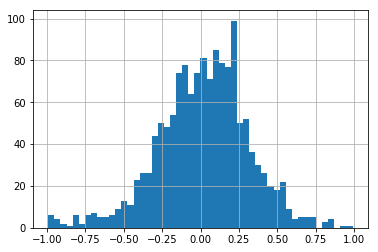

In [98]:
stdtargets = pd.Series(std_target[0])
pred = pd.Series(predictions)
diff = pred.sub(stdtargets)
diff[diff<1][diff>-1].hist(bins=50)

502389.16542760166


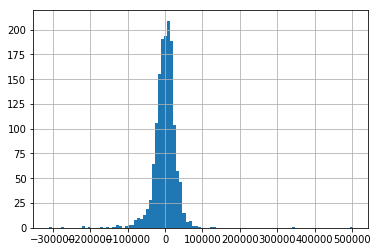

In [107]:
diff2.hist(bins=100)
print(max(diff2))

Plotting in terms of raw units

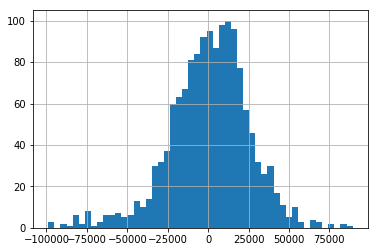

In [104]:
linear_regression_model.fit(std_df, target)
predictions = linear_regression_model.predict(std_df)
pred=pd.Series(predictions)
diff2 = pred.sub(target)
diff2[diff2<100000][diff2>-100000].hist(bins=50)
